<a href="https://colab.research.google.com/github/SergioMadeiraJr/DataProjects/blob/main/Analise_explanat%C3%B3ria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
salesdaily = pd.read_csv("/content/sample_data/Pharma sales data/salesdaily.csv")
salesdaily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


Sobre o conjunto de dados
O conjunto de dados é construído a partir do conjunto de dados inicial composto por 600.000 dados transacionais coletados em 6 anos (período 2014-2019), indicando data e hora da venda, marca do medicamento farmacêutico e quantidade vendida, exportados do sistema Ponto de Venda no indivíduo farmacia. O grupo selecionado de medicamentos do conjunto de dados (57 medicamentos) é classificado nas seguintes categorias do Sistema de Classificação Anatomical Therapeutic Chemical (ATC):

M01AB - Produtos antiinflamatórios e antirreumáticos, não esteróides, derivados do ácido acético e substâncias relacionadas

M01AE - Produtos antiinflamatórios e antirreumáticos, não esteróides, derivados do ácido propiônico

N02BA - Outros analgésicos e antipiréticos, Ácido salicílico e derivados

N02BE/B - Outros analgésicos e antipiréticos, Pirazolonas e Anilidas

N05B - ​​Drogas psicolépticas, Drogas ansiolíticas

N05C - Drogas psicolépticas, drogas hipnóticas e sedativas

R03 - Medicamentos para doenças obstrutivas das vias aéreas

R06 - Anti-histamínicos de uso sistêmico


<ipython-input-12-42cdf7854b59>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = salesdaily.groupby(['Date']).sum()


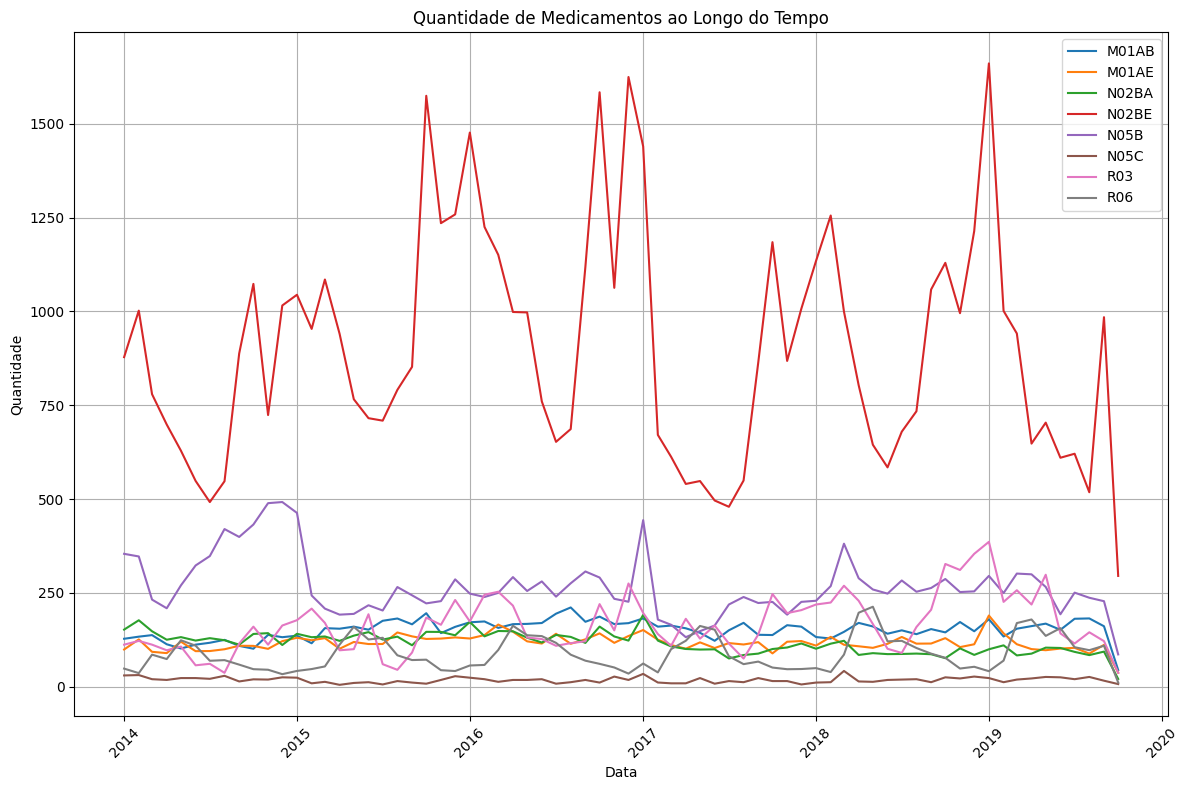

In [12]:
# Converteedo as colunas de ano e mês para datetime
salesdaily['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Agrupando os dados por medicamento e mês
grouped_data = salesdaily.groupby(['Date']).sum()

# Lista de medicamentos
medicamentos = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Traçando os gráficos para cada medicamento
plt.figure(figsize=(12, 8))
for medicamento in medicamentos:
    plt.plot(grouped_data.index, grouped_data[medicamento], label=medicamento)

plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.title('Quantidade de Medicamentos ao Longo do Tempo')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()




In [14]:

# Criando um DataFrame para armazenar as estatísticas
estatisticas_df = pd.DataFrame(columns=['Medicamento', 'Média', 'Mediana', 'Desvio Padrão'])

# Calculando as estatísticas para cada medicamento
for medicamento in medicamentos:
    media = salesdaily[medicamento].mean()
    mediana = salesdaily[medicamento].median()
    desvio_padrao = salesdaily[medicamento].std()

    estatisticas_df = estatisticas_df.append({
        'Medicamento': medicamento,
        'Média': media,
        'Mediana': mediana,
        'Desvio Padrão': desvio_padrao
    }, ignore_index=True)

print(estatisticas_df)


  Medicamento      Média  Mediana  Desvio Padrão
0       M01AB   5.033683     4.99       2.737579
1       M01AE   3.895830     3.67       2.133337
2       N02BA   3.880441     3.50       2.384010
3       N02BE  29.917095    26.90      15.590966
4        N05B   8.853627     8.00       5.605605
5        N05C   0.593522     0.00       1.092988
6         R03   5.512262     4.00       6.428736
7         R06   2.900198     2.00       2.415816


<ipython-input-14-6c357abdd523>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estatisticas_df = estatisticas_df.append({
<ipython-input-14-6c357abdd523>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estatisticas_df = estatisticas_df.append({
<ipython-input-14-6c357abdd523>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estatisticas_df = estatisticas_df.append({
<ipython-input-14-6c357abdd523>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estatisticas_df = estatisticas_df.append({
<ipython-input-14-6c357abdd523>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [17]:

# Calculando a soma total das quantidades de cada medicamento
total_quantidades = salesdaily[medicamentos].sum()

# Criaando um DataFrame com as somas totais
total_df = pd.DataFrame({
    'Medicamento': total_quantidades.index,
    'Total Quantidade': total_quantidades.values
})

# Ordenando o DataFrame pelas quantidades em ordem decrescente
total_df = total_df.sort_values(by='Total Quantidade', ascending=False)

# Medicamentos mais comuns (top 10 )
medicamentos_mais_comuns = total_df.head(10)

print("Medicamentos mais comuns:")
print(medicamentos_mais_comuns)




Medicamentos mais comuns:
  Medicamento  Total Quantidade
3       N02BE      63005.402708
4        N05B      18645.737500
6         R03      11608.822917
0       M01AB      10600.937083
1       M01AE       8204.618646
2       N02BA       8172.209000
7         R06       6107.817500
5        N05C       1249.958333


<Figure size 1000x600 with 0 Axes>

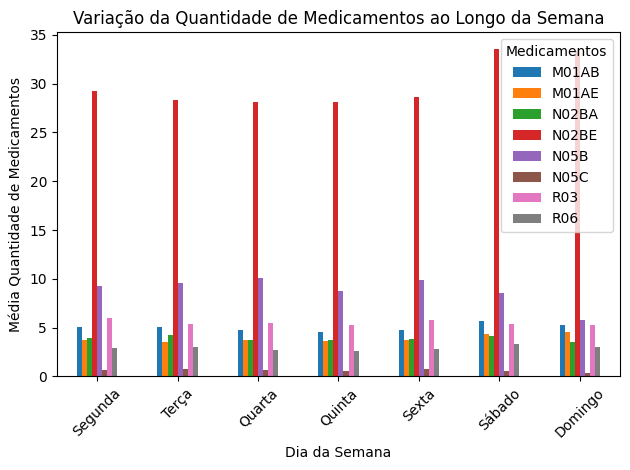

In [18]:
# Converteendo a coluna de data para datetime
salesdaily['Date'] = pd.to_datetime(salesdaily[['Year', 'Month']].assign(DAY=salesdaily['datum'].str.split('/').str[1]))

# Definindo os nomes dos dias da semana
dias_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

# Adicionando uma coluna para o dia da semana
salesdaily['Dia da Semana'] = salesdaily['Date'].dt.dayofweek

# Agrupando os dados por dia da semana e calcular a média das quantidades
medicamentos = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
grupo_dia_semana = salesdaily.groupby('Dia da Semana')[medicamentos].mean()

# Plotando um gráfico de barras para visualizar a variação ao longo dos dias da semana
plt.figure(figsize=(10, 6))
grupo_dia_semana.plot(kind='bar')
plt.xlabel('Dia da Semana')
plt.ylabel('Média Quantidade de Medicamentos')
plt.title('Variação da Quantidade de Medicamentos ao Longo da Semana')
plt.xticks(np.arange(7), dias_semana, rotation=45)
plt.legend(title='Medicamentos')
plt.tight_layout()
plt.show()
